#### **Library**

In [1]:
from google.colab import drive

# Mount Google-Drive Directory
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
from google.colab import userdata
warnings.filterwarnings('ignore')

In [3]:
FOLDER_PATH = Path(f"{userdata.get('FOLDER_PATH')}/SentXAI-Covid19")
%cd $FOLDER_PATH

/content/gdrive/MyDrive/AI Models/SupervisedLearning/SentXAI-Covid19


#### **Load Dataset**

In [4]:
# Load processed dataset
FILE_NAME = "processed/corona_tweets_covid19.csv"
pd.set_option("display.max_colwidth", 140)
df = pd.read_csv(FILE_NAME) \
    .dropna() \
    .reset_index(drop=True)
df.head()

,tweet,text,sentiment
0,"coronavirus latest:drivers in #nj, around country still seeing gas prices drop amid covid- - mar 21 @ 10:28 am et https://t.co/zxlzvhbyvw",latest driver country gas price drop amid,neg(-)
1,itâs a difficult time for everyone at the moment but please do not stockpile and panic buy.. if you just buy what you need as normal th...,difficult time moment stockpile panic buy buy normal plenty food essential supply thinkofothers especially elderly dontbeselfish,ext-pos(+)
2,or buy gift certificates for others who may be in self-quarantine. a little online shopping will pass the time and keep local businesses...,buy gift certificate online shopping time local business alive book book,ext-pos(+)
3,"""la rental prices fall for the first time in a decade.""\r\r\n#coronavirus #realestate #investment \r\r\n\r\r\nhttps://t.co/1hniyhoooa",rental price fall time decade realestate investment,neu(0)
4,covid-19 coronavirus: rotorua shoppers wear beekeeping suits to supermarket ????? https://t.co/qfpj5kzn1p,rotorua shopper wear beekeeping suit supermarket,neu(0)


#### **Data Analysis**

In [5]:
pd.set_option("display.max_colwidth", None)
data = df.copy()
data["tokens"] = data["text"].str.split()
data = data[["text", "tokens", "sentiment"]]
data.head()

,text,tokens,sentiment
0,latest driver country gas price drop amid,"[latest, driver, country, gas, price, drop, amid]",neg(-)
1,difficult time moment stockpile panic buy buy normal plenty food essential supply thinkofothers especially elderly dontbeselfish,"[difficult, time, moment, stockpile, panic, buy, buy, normal, plenty, food, essential, supply, thinkofothers, especially, elderly, dontbeselfish]",ext-pos(+)
2,buy gift certificate online shopping time local business alive book book,"[buy, gift, certificate, online, shopping, time, local, business, alive, book, book]",ext-pos(+)
3,rental price fall time decade realestate investment,"[rental, price, fall, time, decade, realestate, investment]",neu(0)
4,rotorua shopper wear beekeeping suit supermarket,"[rotorua, shopper, wear, beekeeping, suit, supermarket]",neu(0)


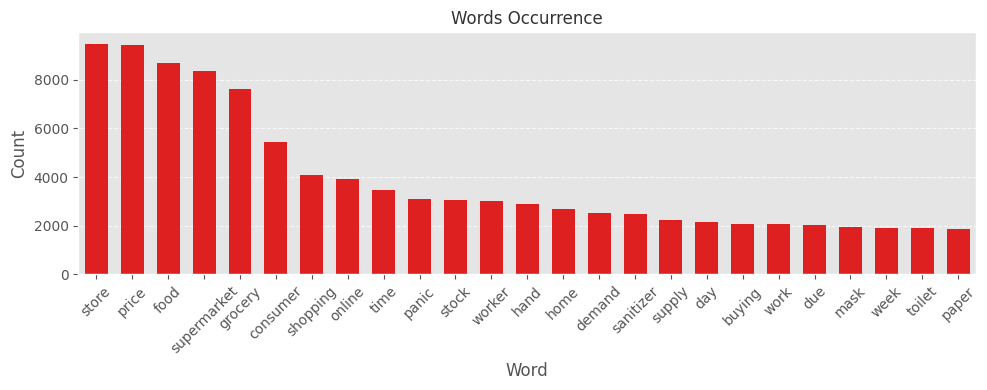

In [8]:
# Explode tokens and create a DataFrame
tokens = data.tokens.explode().reset_index(drop=True).values
token_df = pd.DataFrame(tokens, columns=["word"])

# Group and count word occurrences
word_counts = (
    token_df.groupby("word", as_index=False)
    .size()
    .sort_values("size", ascending=False)
)

# Define visualization parameters
topn = 25
fig, ax = plt.subplots(figsize=(10, 4))
plt.style.use("ggplot")

# Create bar chart
sns.barplot(
    word_counts[:topn], x="word", y="size", color="red", gap=0.2, ax=ax
)

# Customize plot
ax.set_title("Words Occurrence", fontsize=12, alpha=0.8)
ax.set_ylabel("Count", fontsize=12)
ax.set_xlabel("Word", fontsize=12)
plt.xticks(rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

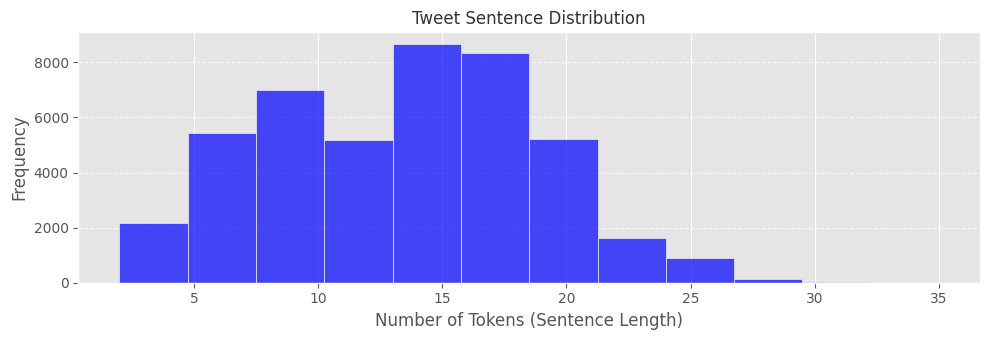

In [7]:
# Calculate sentence lengths (tokens per sentence)
sentence_lengths = data["tokens"].str.len().dropna()

# Create a histogram of sentence lengths
fig, ax = plt.subplots(figsize=(10, 3.5))
plt.style.use("ggplot")

sns.histplot(
    x=sentence_lengths, bins=12, color="blue", alpha=0.7, ax=ax
)

# Set axis labels and title
ax.set_title("Tweet Sentence Distribution", fontsize=12, alpha=0.8)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_xlabel("Number of Tokens (Sentence Length)", fontsize=12)

# Add grid and adjust layout
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()